In [ ]:
#!pip install torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
#!pip install facenet_pytorch
#!pip install opencv-python
#!pip install numpy
#!pip install pillow

In [1]:
from PIL import Image 
from tqdm.auto import tqdm

import torch
import numpy as np
import cv2

from facenet_pytorch import MTCNN

video_path = 'data/video_face_tracking.mp4'
write_path = 'data/video_face_tracking_out.avi'

fd = MTCNN()

def get_frames(video_path = video_path):
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, img = cap.read()
        if not ret:
            cap.release()
            return None
        yield img[:,:,[2,1,0]].copy()
        
def write_frames(imgs, write_path = write_path):
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    h, w = imgs[0].shape[:2]
    out = cv2.VideoWriter(video_path, fourcc, 10.0, (w, h))
    
    for img in imgs:
        out.write(img)
    out.release()
    
def detect(batchs):
    for batch in batchs:
        fs, ps = fd.detect(list(batch))
        for face_boxes, probs in zip(fs, ps):
            yield face_boxes, probs

def draw_boxes(img, boxes):
    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(img, (x1, y1), (x2, y2), color=(255,0,0), thickness=4)
    return img

In [2]:
from IPython.display import Video
Video(video_path, width=512)

In [3]:
frames = [frame for frame in get_frames()]
batchs = np.array_split(frames, 20)

In [ ]:
frame_infos = detect(batchs) 
frame_infos = tqdm(frame_infos, total=len(frames))
frame_infos = list(frame_infos)

In [6]:
imgs = [draw_boxes(img, box) for img, (box, _) in zip(frames, frame_infos)]

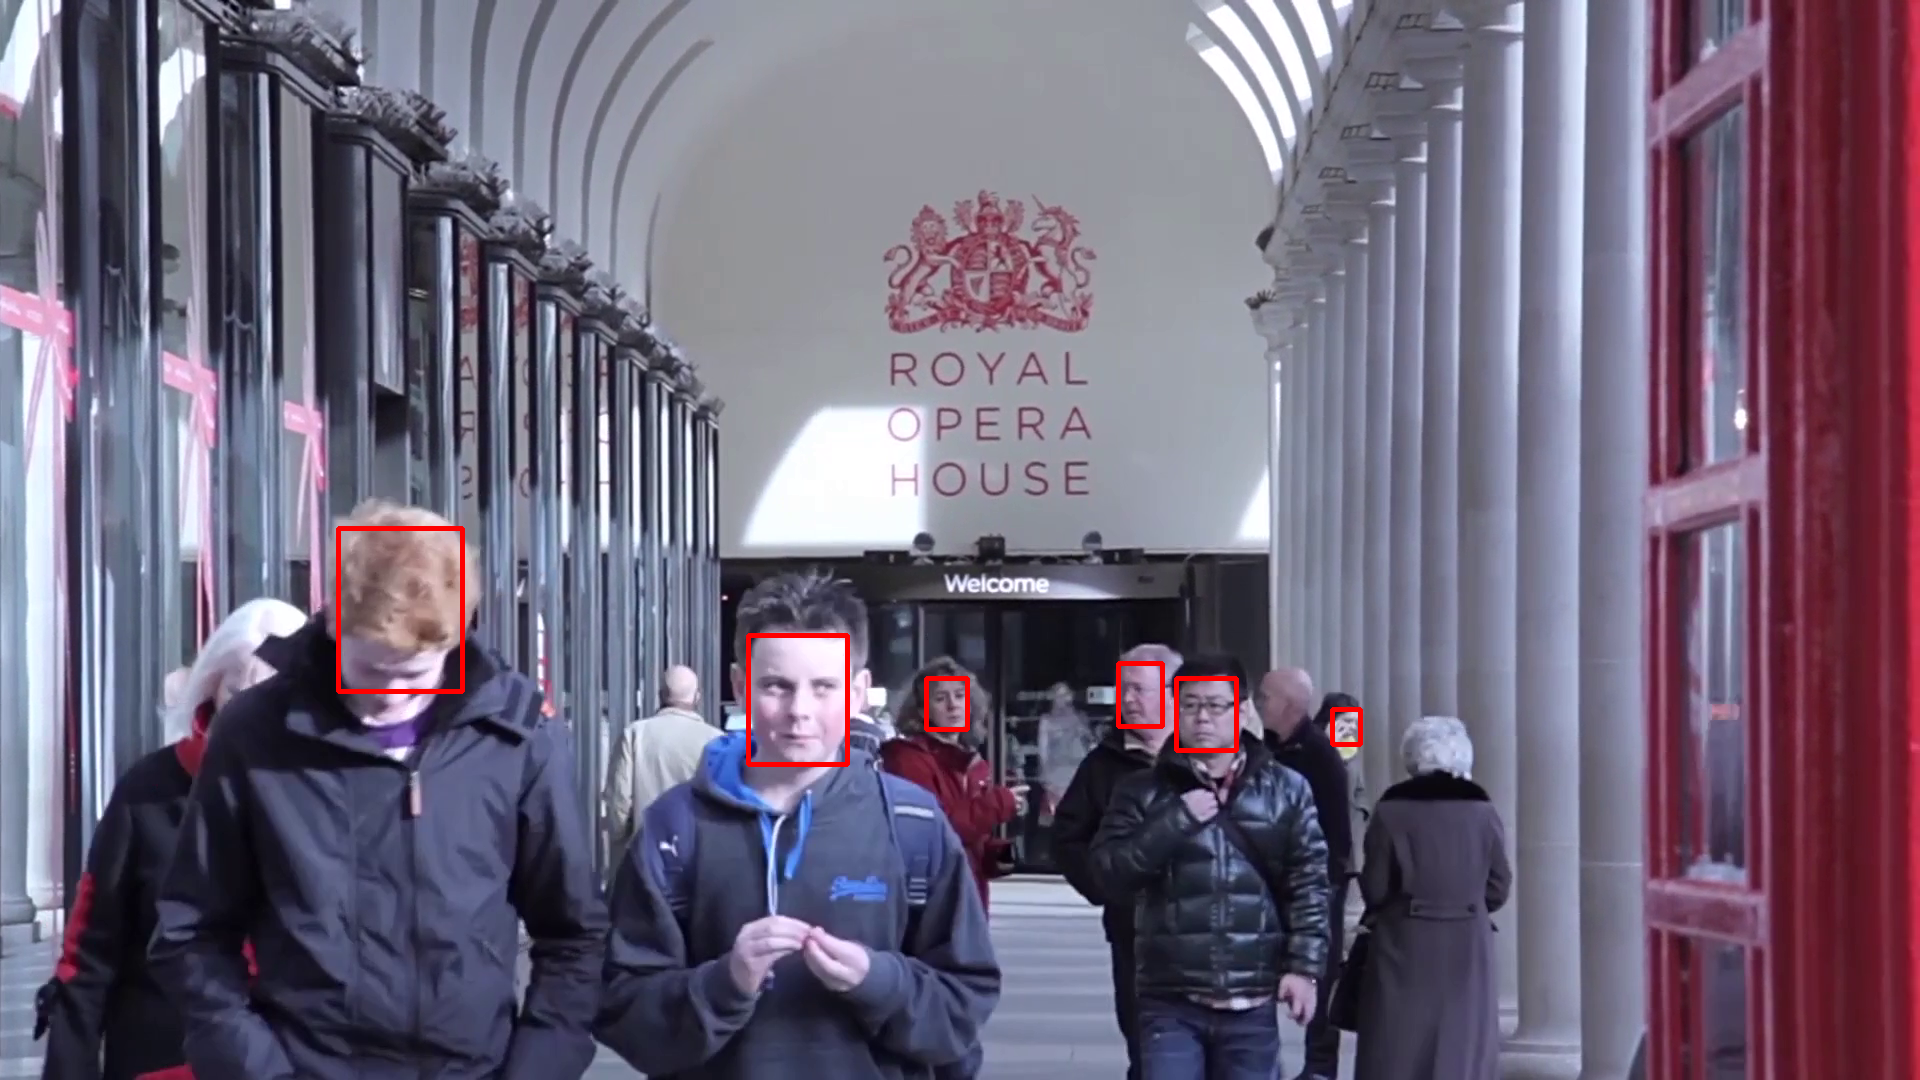

In [7]:
Image.fromarray(imgs[-1])

In [9]:
write_frames(imgs)

---
## 숙제
  
1. 이 노트북을 실행시켜 ./data/video_face_tracking_out.avi 파일을 생성하고 곰플레이어 등으로 열어서 감상하세요.
     
2. 이 노트북의 모든 코드셀을 분석 후 적당히 주석을 달아 주세요.   

3. 출력 동영상은 사람들 얼굴에 붉은 박스로 표시를 했는데요
   각 프레임별로 가장 확률이 높게 예측한 박스는 녹색으로 표기해 주세요.  
   (나머지 박스는 기존과 같이 붉은색으로 표기하면 됩니다)
   
4. *remind* 각자 Numpy를 마스터 하세요.  유튜브와 관련책을 참고하면 좋습니다.